In [3]:
import os
import pandas as pd
from tqdm import tqdm

In [4]:
data_folder = r"C:\Users\likhi\Documents\02 Pycharm Datasets\01 Master Thesis\04 Product Data"

In [5]:
data_eda = pd.DataFrame()

categories = os.listdir(data_folder)
data_eda['categories'] = categories
data_eda['Product Count'] = [len(os.listdir(os.path.join(data_folder, category))) for category in categories]

In [6]:
valid_products = []
valid_products_with_images = []

for category in tqdm(categories):
    
    product_count = 0
    product_count_with_images = 0
    
    for product in os.listdir(os.path.join(data_folder, category)):
        if len(os.listdir(os.path.join(data_folder, category, product))) > 0:
            product_count += 1
        if len(os.listdir(os.path.join(data_folder, category, product))) > 1:
            product_count_with_images += 1
    
    valid_products.append(product_count)
    valid_products_with_images.append(product_count_with_images)

100%|██████████| 265/265 [01:54<00:00,  2.32it/s]


In [7]:
data_eda['Product Count with valid data'] = valid_products
data_eda['Product Count with valid data and images'] = valid_products_with_images

In [8]:
filtered_data_eda = data_eda[data_eda['Product Count'] > 10]

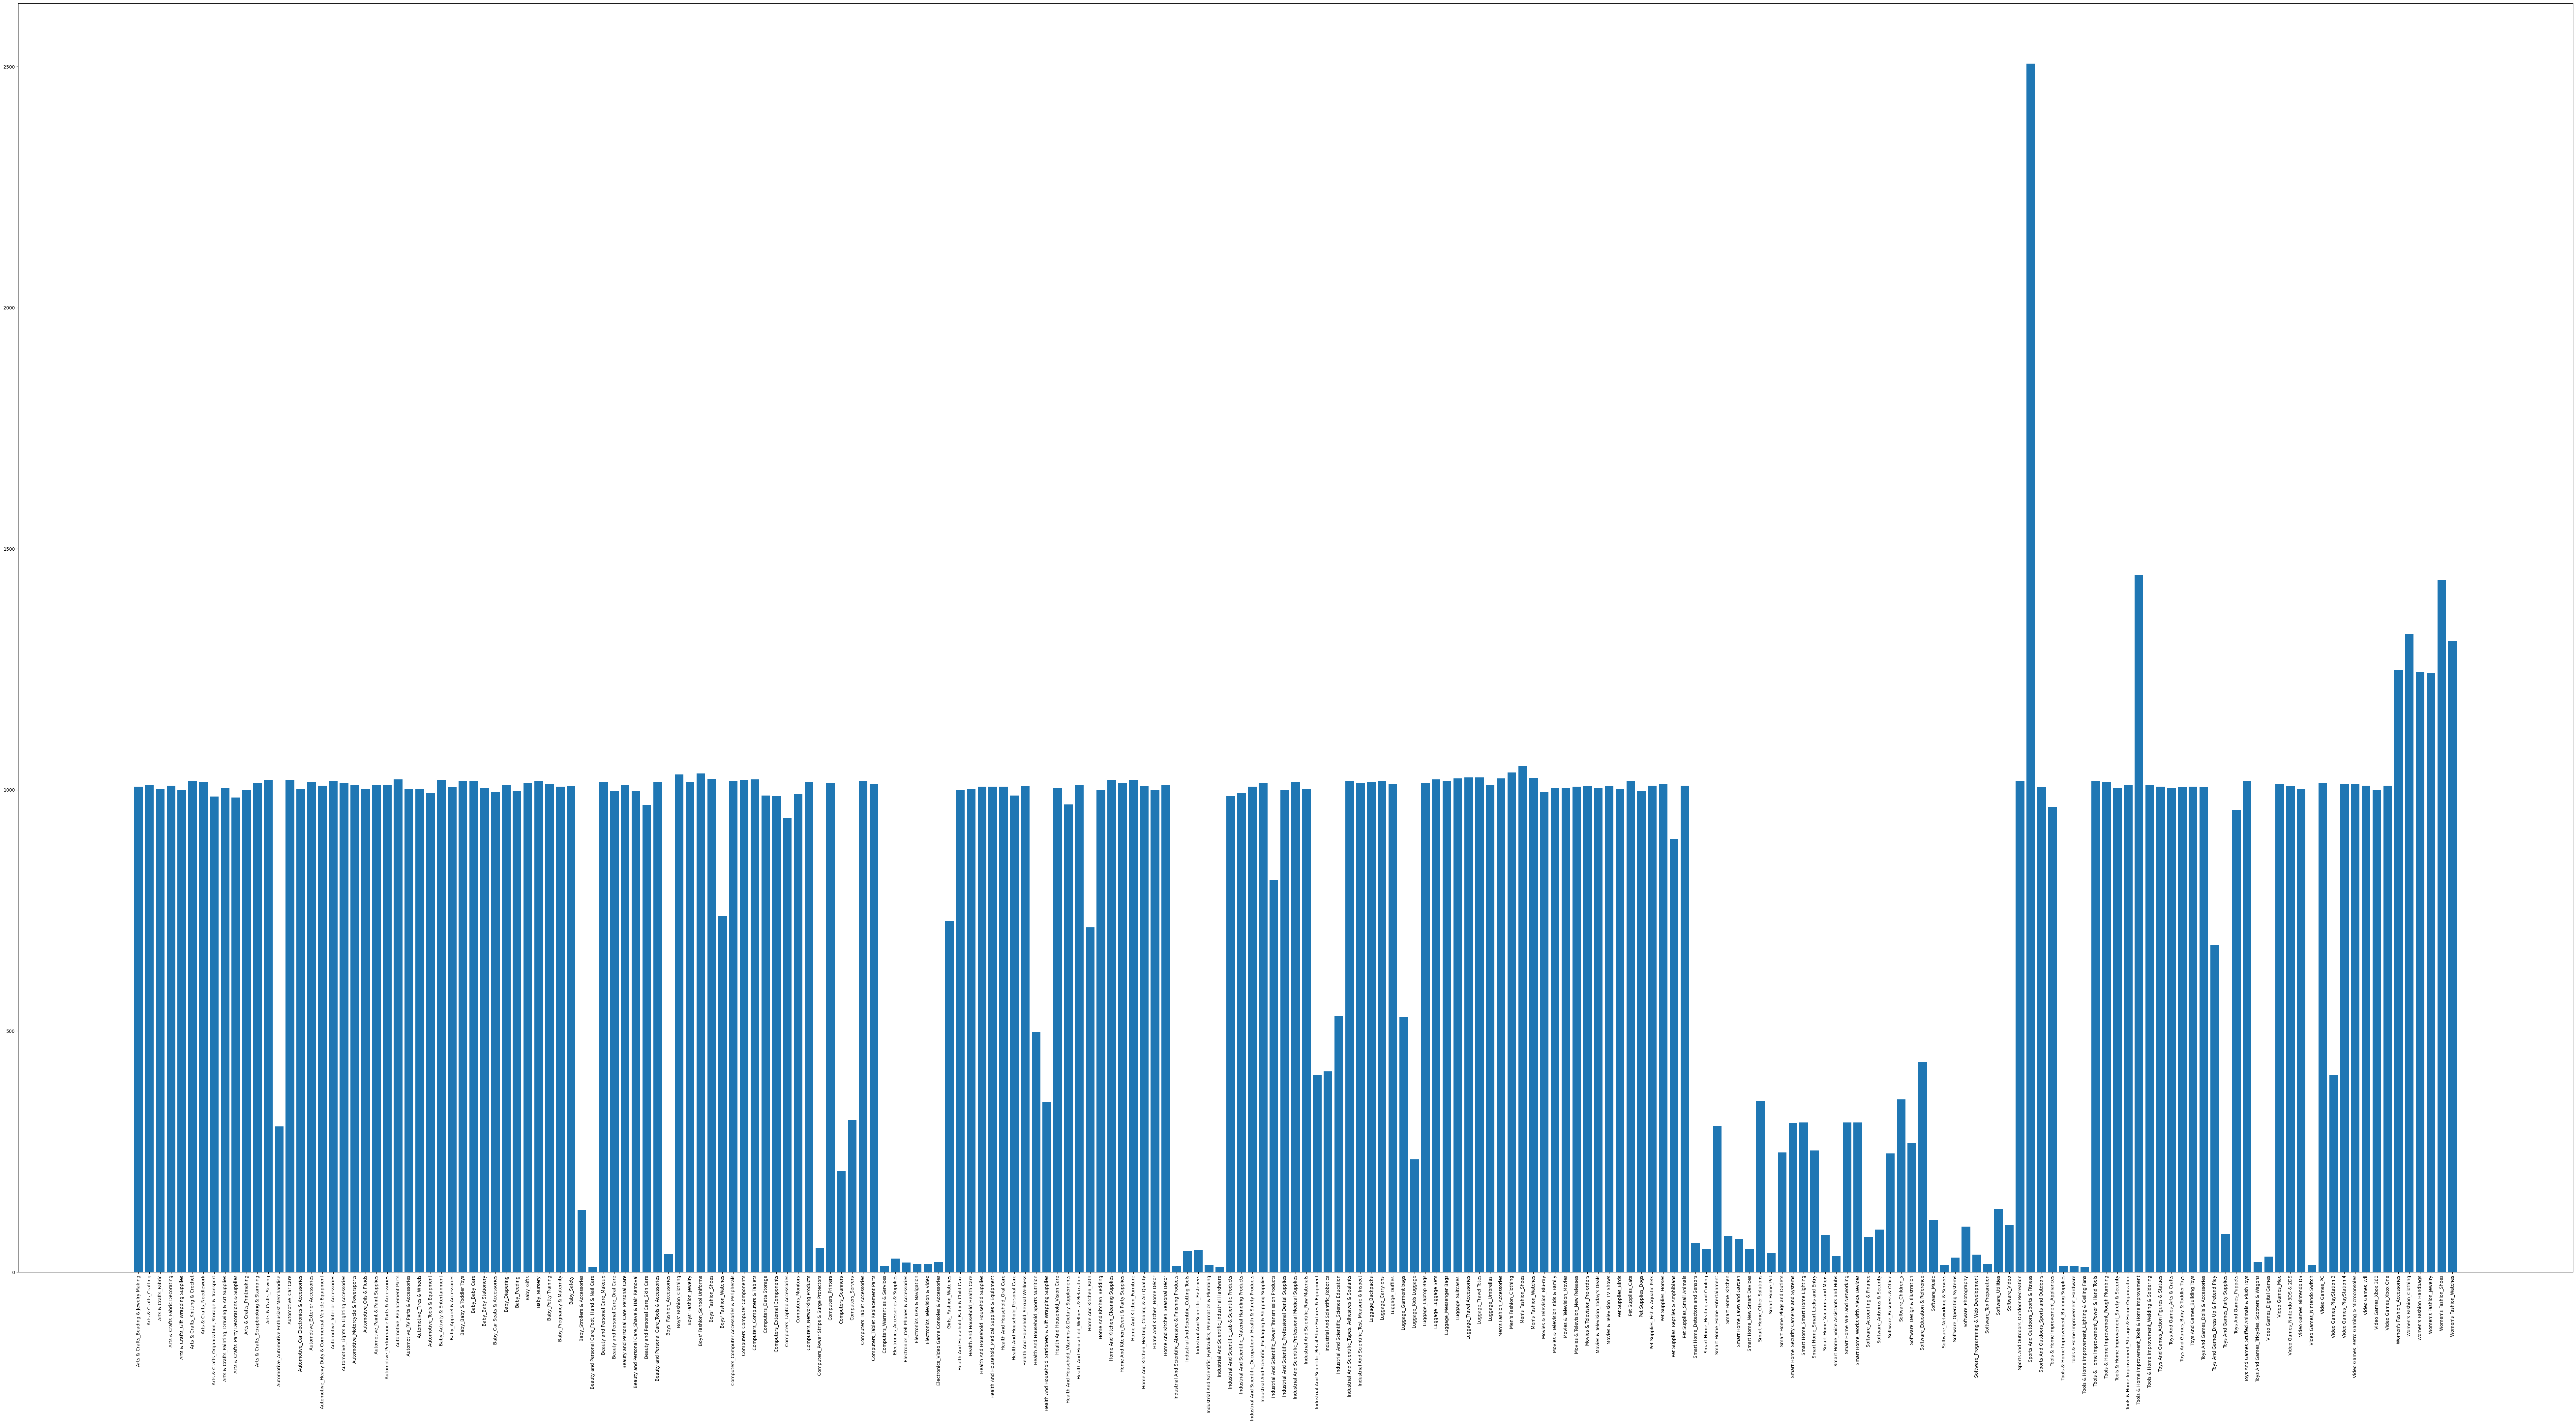

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.figure(figsize=(100,50))

plt.bar(filtered_data_eda['categories'], filtered_data_eda['Product Count'])
plt.xticks(rotation=90)
plt.show()

In [30]:
filtered_data_eda

,categories,Product Count,Product Count with valid data,Product Count with valid data and images
0,Arts & Crafts_Beading & Jewelry Making,1007,1006,893
1,Arts & Crafts_Crafting,1010,1010,980
2,Arts & Crafts_Fabric,1001,922,786
3,Arts & Crafts_Fabric Decorating,1009,1008,340
4,Arts & Crafts_Gift Wrapping Supplies,1000,1000,951
...,...,...,...,...
260,Women's Fashion_Clothing,1324,1031,31
261,Women's Fashion_Handbags,1244,1029,172
262,Women's Fashion_Jewelry,1242,1004,293
263,Women's Fashion_Shoes,1435,1349,902


In [26]:
avg_filtered_data_eda = filtered_data_eda[['Product Count', 'Product Count with valid data',
                                           'Product Count with valid data and images']].mean()
avg_filtered_data_eda

Product Count                               768.190698
Product Count with valid data               738.874419
Product Count with valid data and images    572.730233
dtype: float64

In [28]:
len(filtered_data_eda)

215

In [29]:
sum_filtered_data_eda = filtered_data_eda[['Product Count', 'Product Count with valid data',
                                           'Product Count with valid data and images']].sum()
sum_filtered_data_eda

Product Count                               165161
Product Count with valid data               158858
Product Count with valid data and images    123137
dtype: int64